In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/home/max/projects/energy-interventions/learning-relevance/utils.py'>

In [2]:
df = pd.read_csv('docs.csv')
df.head()

,Unnamed: 0,index,PY,UT_id,authors,citation_objects,content,date,dtype,duplicated,...,relevant,scopus,source,tilength,title,uploaded,uploader_id,url,wos,ymentions
0,0,0,2016,WOS:000367758200113,NaN,False,Falling costs and supportive government polici...,NaN,NaN,False,...,0,False,NaN,NaN,Assessing the short-term revenue impacts of re...,False,NaN,NaN,True,NaN
1,1,1,2014,WOS:000342530000050,NaN,False,"Advances in IT, control and forecasting capabi...",NaN,NaN,False,...,0,False,NaN,NaN,Benefits and challenges of electrical demand r...,False,NaN,NaN,True,NaN
2,2,2,2015,WOS:000359875100064,"Bhattacharya, M, Rafiq, S, Bhattacharya, S",True,Coal comprises 70% of primary energy sources a...,NaN,NaN,False,...,0,False,NaN,99.0,The role of technology on the dynamics of coal...,False,NaN,NaN,True,NaN
3,3,3,2012,WOS:000306860700048,"Lopes, MAR, Lopes, MAR, Antunes, CH, Antunes, ...",False,Energy behaviours represent a significant unta...,NaN,NaN,False,...,0,False,NaN,74.0,Energy behaviours as promoters of energy effic...,False,NaN,NaN,True,NaN
4,4,4,2014,2-s2.0-84889642965,"Korkua, S.K., Thinsurat, K.",False,In order to strengthen energy security while r...,NaN,NaN,False,...,0,True,NaN,108.0,A load prioritization model for a smart demand...,False,NaN,NaN,False,NaN


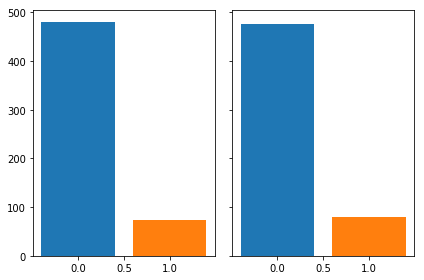

In [3]:
train, test = utils.traintest(df,0.5)

i = 0
fig, axs = plt.subplots(1,2,sharey=True)

for name, group in train.groupby('relevant'): 
    axs[0].bar(i,group['id'].size)
    i+=1
i=0
for name, group in test.groupby('relevant'): 
    axs[1].bar(i,group['id'].size)
    i+=1
    
fig.tight_layout()

In [4]:
vec = TfidfVectorizer(
    ngram_range=(1,3),
    min_df=3, max_df=0.9, strip_accents='unicode', 
    use_idf=1,
    smooth_idf=1, sublinear_tf=1,
    stop_words="english",tokenizer=utils.tokenize
)

X = vec.fit_transform(df['content'])
y = np.array(df['relevant'])

clf = SVC(kernel='rbf',probability=True)
clf.fit(X[train.index],y[train.index])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

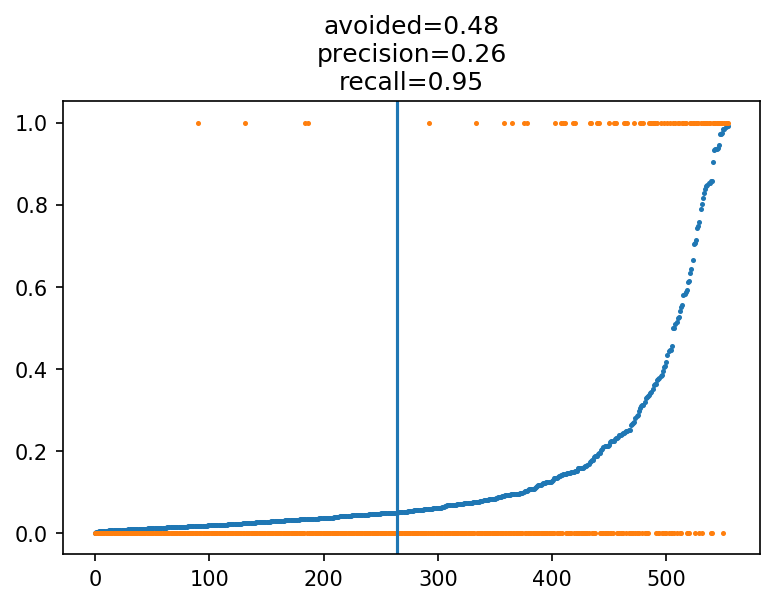

In [5]:
fig, ax = plt.subplots(dpi=150)

utils.plot_model_accuracy(clf,X[test.index],y[test.index],ax,0.05)

/home/max/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


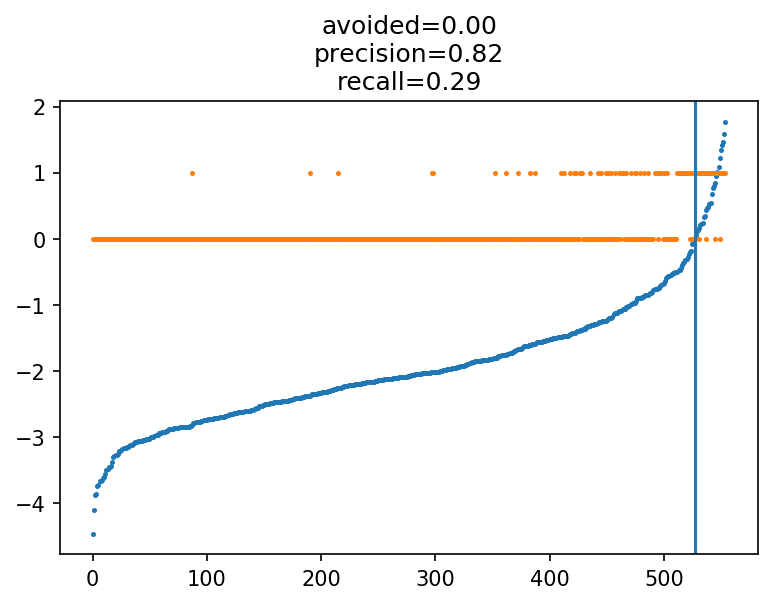

In [6]:
fig, ax = plt.subplots(dpi=150)

clf = SGDClassifier()
clf.fit(X[train.index],y[train.index])
utils.plot_model_accuracy(clf,X[test.index],y[test.index],ax,0.0)

In [7]:
d_f = clf.decision_function(X[test.index])
d_f

array([-0.18874926, -0.55985754, -0.50528609, -2.29484676, -1.85632904,
       -2.62207064, -0.73784994, -1.83381448, -3.17793689, -1.46243395,
       -1.58757188, -1.66800939, -1.85114262,  1.76608331, -1.42331327,
        0.23378345, -1.5002311 , -1.51244649, -2.77508435, -1.58597885,
       -2.71890467, -0.32439614, -2.28436392, -1.72557847, -2.68033822,
       -2.99930998, -3.26299665, -0.96848434, -1.20022545, -0.88572884,
       -3.0575326 , -2.35175191, -2.01642129, -2.84361597, -2.17129173,
       -4.45803106, -1.73408625, -1.20047453, -1.62047778, -1.8374362 ,
       -2.60842605, -1.69117269, -2.17007701, -1.01354988, -2.16206065,
       -1.09276896, -2.07951811, -1.80733808, -0.85138357, -2.82726715,
       -2.85060297, -1.97415173, -0.69857425, -2.18675267, -0.84046473,
       -2.6236005 , -0.40198211, -2.12141268, -3.13977927, -3.47218674,
       -2.93533935, -2.92091091, -2.96392079, -2.68831609, -2.01455854,
       -2.73534373, -2.59264028,  1.224316  , -3.06121887, -2.46

<IPython.core.display.Javascript object>


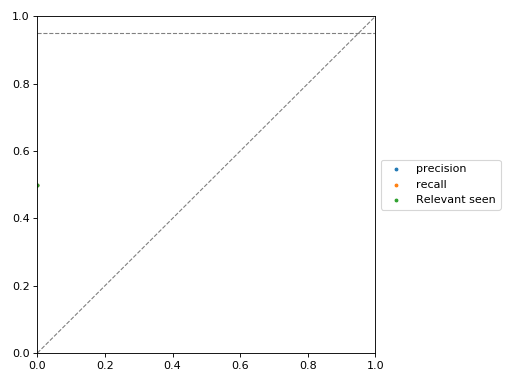

In [25]:
%matplotlib notebook
%matplotlib notebook
import importlib
importlib.reload(utils)

model = MultinomialNB(alpha=1)
model = SVC(kernel='rbf',probability=True)

ss = utils.ScreenSimulation(df,model,X,y)

ss.simulate()

Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


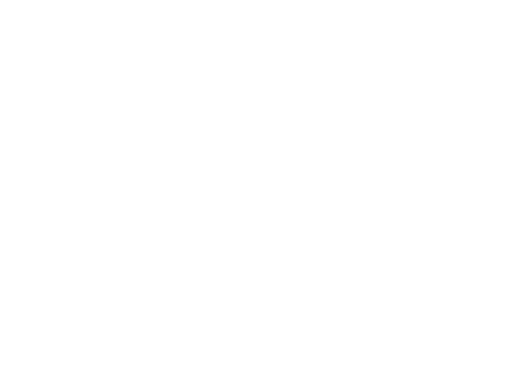

In [9]:
%matplotlib notebook
import importlib
importlib.reload(utils)

model = MultinomialNB(alpha=1)
model = SVC(kernel='rbf',probability=True)

ss = utils.ScreenSimulation(df,model,X,y)

ss.simulate(25,"relevant_first")

Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


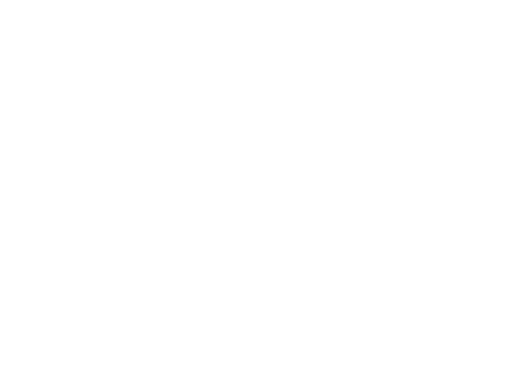

In [10]:
%matplotlib notebook
import importlib
importlib.reload(utils)

model = MultinomialNB(alpha=1)
model = SVC(kernel='rbf',probability=True)

ss = utils.ScreenSimulation(df,model,X,y)

ss.simulate(25,"relevant_first_delay",0.95)

Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


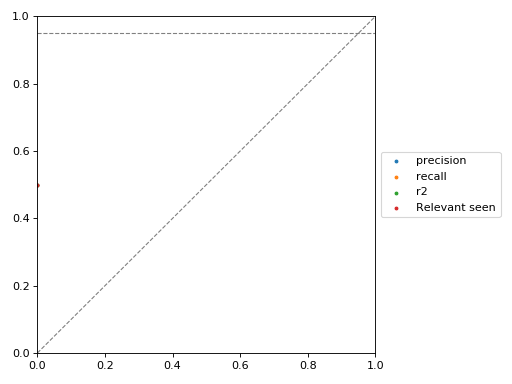

In [15]:
%matplotlib notebook
%matplotlib notebook
import importlib
importlib.reload(utils)

model = MultinomialNB(alpha=1)
model = SVC(kernel='rbf',probability=True)

ss = utils.ScreenSimulation(df,model,X,y)

ss.simulate(25,"relevant_last")

<IPython.core.display.Javascript object>


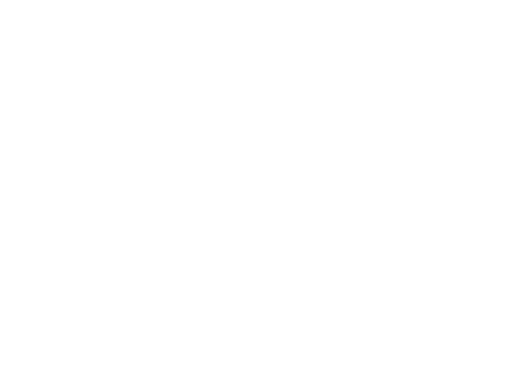

In [12]:
fig, ax = plt.subplots()

ax.plot([0,1],[0,1],linestyle="--",color="grey",linewidth=1)

Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


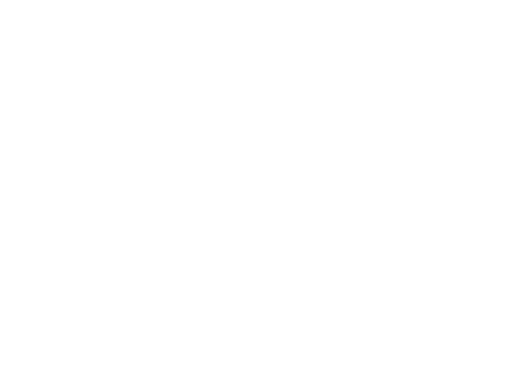

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation

x = [1,1]
y = [1,2]

fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
line1, = ax1.plot(x)
line2, = ax2.plot(y)
ax1.set_xlim(-1,18)
ax1.set_ylim(-400,3000)


def update(i):
    x.append(x[-1]+x[-2])
    line1.set_data(range(len(x)), x)
    y.append(y[-1]+y[-2])
    line2.set_data(range(len(y)), y)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=14, repeat=False)   
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

train,test = utils.traintest(df,0.5)

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X[train.index], y[train.index])

#fig, ax = plt.subplots()

clf.score(X,y)


/home/max/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


TypeError: list indices must be integers or slices, not Int64Index

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

train,test = utils.traintest(df,0.5)

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', MultinomialNB())
])
clf.fit(X[train.index], y[train.index])

#fig, ax = plt.subplots()

clf.score(X,y)
